In [10]:
from pathlib import Path

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# parameters

In [11]:

DATAPATH = './MINST.csv'
TEST_SIZE = 0.2
EPOCHS = 100
BATCH_SIZE = 100

# data

In [12]:
df = pd.read_csv(DATAPATH)
enc = OneHotEncoder()
labels = df.pop('label').values
labels = enc.fit_transform(labels.reshape(-1, 1)).toarray()
samples = df.to_numpy()

# models

In [13]:
model3 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model4 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# training

In [14]:
model3.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
model4.compile(
    optimizer=tf.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
history3 = model3.fit(
    samples,
    labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=TEST_SIZE,
)
history4 = model4.fit(
    samples,
    labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=TEST_SIZE,
)

Epoch 1/100
8/8 [==============================] - 1s 19ms/step - loss: 102.6788 - accuracy: 0.2003 - val_loss: 60.7810 - val_accuracy: 0.3100
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 35.6218 - accuracy: 0.4068 - val_loss: 28.1172 - val_accuracy: 0.4350
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 17.7224 - accuracy: 0.5344 - val_loss: 17.5092 - val_accuracy: 0.5400
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 11.4747 - accuracy: 0.5932 - val_loss: 13.1303 - val_accuracy: 0.5950
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 7.4728 - accuracy: 0.6658 - val_loss: 10.4579 - val_accuracy: 0.6100
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 5.1464 - accuracy: 0.7071 - val_loss: 9.2180 - val_accuracy: 0.5800
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 3.6616 - accuracy: 0.7272 - val_loss: 8.3580 - val_accuracy: 0.5700
Epoch 8/100
8/8 

# Draw a curve(s) of error (training and testing) vs number of epochs for both neural networks.

# plotting

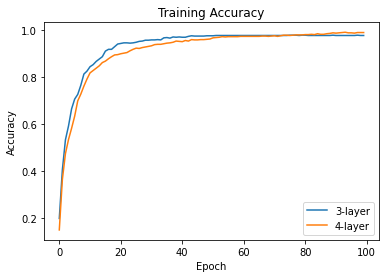

In [15]:
plt.plot(history3.history['accuracy'], label='3-layer')
plt.plot(history4.history['accuracy'], label='4-layer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.savefig('train_accuracy.png')
plt.show()

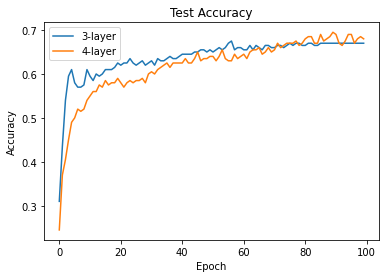

In [16]:
plt.plot(history3.history['val_accuracy'], label='3-layer')
plt.plot(history4.history['val_accuracy'], label='4-layer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()
plt.savefig('test_accuracy.png')
plt.show()

# Clarify network design (NN) and hyper-parameters.

3-layer network has a hidden layer size of 32. 4-layer network has hidden layer
sizes of 64 and 32. They both have an input layer size of 784 and an output
layer size of 10.

# Compute test accuracy for both networks and discuss comparative logic behind that performance.

In [17]:
test_accuracy3 = history3.history['val_accuracy'][-1]
test_accuracy4 = history4.history['val_accuracy'][-1]

print(f'3-layer model test accuracy: {test_accuracy3}')
print(f'4-layer model test accuracy: {test_accuracy4}')

3-layer model test accuracy: 0.6700000166893005
4-layer model test accuracy: 0.6800000071525574


In this case, the accuracy of the 4-layer network is higher than the 3-layer
network. However, in some runs, the accuracy was higher in the 4-layer network.
Sometimes, the 4-layer model would overfit the data. In general however, it
seems the performance of the 4-layer network is better than the 3-layer network.